# CovarLags

Debug and Test Covarlags Module

# Notebook Setup

In [1]:
import sforecast as sf
print(f'sforecast version = {sf.__version__}')
import pandas as pd
import numpy as np
import beautifulplots as bp
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from pandas.plotting import autocorrelation_plot
datapath = "../data"

sforecast version = 0.4.4


# Data

df


,X,Y
0,1,12
1,2,14
2,3,16
3,4,18
4,5,20


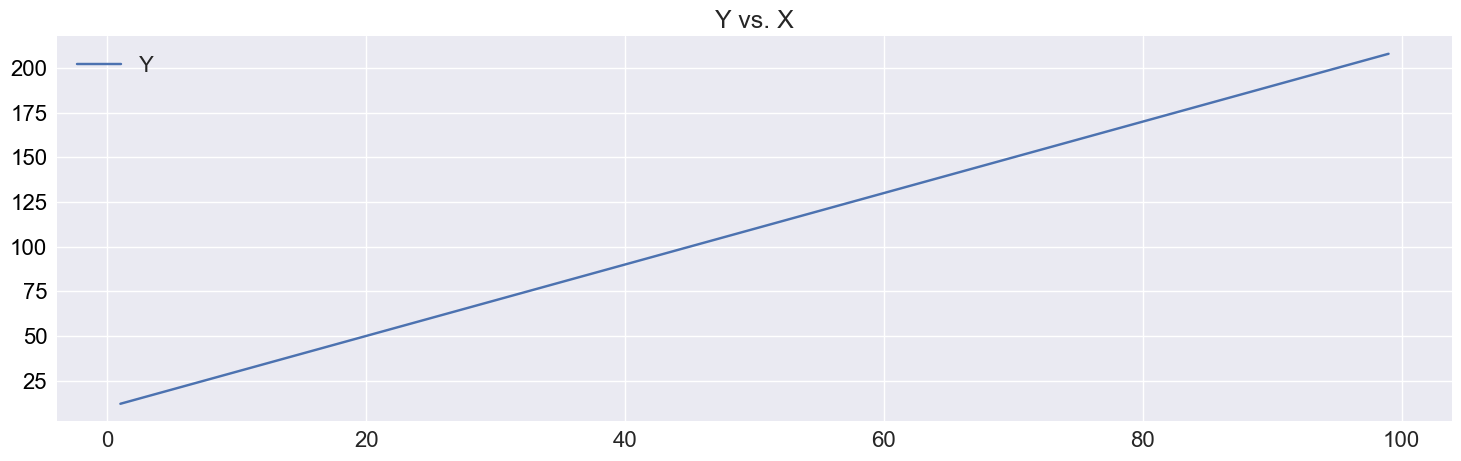

In [2]:
N=100
df=pd.DataFrame({"X":np.arange(1,N,1), "Y":2*np.arange(1,N,1)+10})

print("df")
display(df.head())

bp.lineplot(df,"X","Y",  y_axis_format = ",.0f" , 
            title = "Y vs. X", figsize=(18,5))


# Univariate

In [3]:
# data preperation

dfXY = df[["Y"]].copy()
print('dfXY')
display(dfXY.tail())

# Parameters
Nrows=dfXY.shape[0]
Nlags=40
Ntest=30

# dfXY_Train
dfXY_train=dfXY.iloc[0:Nrows-Ntest].copy()
print("dfXY_train")
display(dfXY_train.tail())

# dfXY_pred
dfXY_pred=dfXY.iloc[Nrows-Ntest:Nrows-Ntest+1].copy()
dfXY_pred["Y"]=[np.NaN]
print("dfXY_pred")
display(dfXY_pred.copy())

dfXY


,Y
94,200
95,202
96,204
97,206
98,208


dfXY_train


,Y
64,140
65,142
66,144
67,146
68,148


dfXY_pred


,Y
69,NaN


In [5]:
# univariate covarlags

from sforecast import covarlags
# instantiate make_lags
make_lags = covarlags(covars=["Y"],Nlags=Nlags)

# fit_transform
dfXY_train=make_lags.fit_transform(dfXY_train)
print("dfXY_train")
display(dfXY_train.tail())

#print("make_lages.dfmemory")
#display(make_lags.dfmemory)

# make_lags transform
dfXY_pred=make_lags.transform(pd.DataFrame(), Nout=1, dfnewrows=dfXY_pred,debug=False)
print(dfXY_pred)
display(dfXY_pred)

dfXY_train


,X,Y,Y_m1,Y_m2,Y_m3,Y_m4,Y_m5,Y_m6,Y_m7,Y_m8,...,Y_m31,Y_m32,Y_m33,Y_m34,Y_m35,Y_m36,Y_m37,Y_m38,Y_m39,Y_m40
64,65,140,138.0,136.0,134.0,132.0,130.0,128.0,126.0,124.0,...,78.0,76.0,74.0,72.0,70.0,68.0,66.0,64.0,62.0,60.0
65,66,142,140.0,138.0,136.0,134.0,132.0,130.0,128.0,126.0,...,80.0,78.0,76.0,74.0,72.0,70.0,68.0,66.0,64.0,62.0
66,67,144,142.0,140.0,138.0,136.0,134.0,132.0,130.0,128.0,...,82.0,80.0,78.0,76.0,74.0,72.0,70.0,68.0,66.0,64.0
67,68,146,144.0,142.0,140.0,138.0,136.0,134.0,132.0,130.0,...,84.0,82.0,80.0,78.0,76.0,74.0,72.0,70.0,68.0,66.0
68,69,148,146.0,144.0,142.0,140.0,138.0,136.0,134.0,132.0,...,86.0,84.0,82.0,80.0,78.0,76.0,74.0,72.0,70.0,68.0


     X   Y   Y_m1   Y_m2   Y_m3   Y_m4   Y_m5   Y_m6   Y_m7   Y_m8  ...  \
69  70 NaN  148.0  146.0  144.0  142.0  140.0  138.0  136.0  134.0  ...   

    Y_m31  Y_m32  Y_m33  Y_m34  Y_m35  Y_m36  Y_m37  Y_m38  Y_m39  Y_m40  
69   88.0   86.0   84.0   82.0   80.0   78.0   76.0   74.0   72.0   70.0  

[1 rows x 42 columns]


,X,Y,Y_m1,Y_m2,Y_m3,Y_m4,Y_m5,Y_m6,Y_m7,Y_m8,...,Y_m31,Y_m32,Y_m33,Y_m34,Y_m35,Y_m36,Y_m37,Y_m38,Y_m39,Y_m40
69,70,NaN,148.0,146.0,144.0,142.0,140.0,138.0,136.0,134.0,...,88.0,86.0,84.0,82.0,80.0,78.0,76.0,74.0,72.0,70.0


# Covariates

In [4]:
# covariate data preperation

dfXY = df.copy()
print('dfXY')
display(dfXY.tail())

# Parameters
Nrows=dfXY.shape[0]
Nlags=40
Ntest=30

# dfXY_Train
dfXY_train=dfXY.iloc[0:Nrows-Ntest].copy()
print("dfXY_train")
display(dfXY_train.tail())

# dfXY_pred
dfXY_pred=dfXY.iloc[Nrows-Ntest:Nrows-Ntest+1].copy()
dfXY_pred["Y"]=[np.NaN]
print("dfXY_pred")
display(dfXY_pred.copy())

dfXY


,X,Y
94,95,200
95,96,202
96,97,204
97,98,206
98,99,208


dfXY_train


,X,Y
64,65,140
65,66,142
66,67,144
67,68,146
68,69,148


dfXY_pred


,X,Y
69,70,NaN


In [6]:
# covariate covarlags

from sforecast import covarlags
# instantiate make_lags
make_lags = covarlags(covars=["X","Y"],Nlags=Nlags)

# fit_transform
dfXY_train=make_lags.fit_transform(dfXY_train)
print("dfXY_train")
display(dfXY_train.tail())

#print("make_lages.dfmemory")
#display(make_lags.dfmemory)

# make_lags transform
dfXY_pred=make_lags.transform(pd.DataFrame(), Nout=1, dfnewrows=dfXY_pred,debug=False)
print(dfXY_pred)
display(dfXY_pred)

dfXY_train


,X,Y,Y_m1,Y_m2,Y_m3,Y_m4,Y_m5,Y_m6,Y_m7,Y_m8,...,X_m31,X_m32,X_m33,X_m34,X_m35,X_m36,X_m37,X_m38,X_m39,X_m40
64,65,140,138.0,136.0,134.0,132.0,130.0,128.0,126.0,124.0,...,34.0,33.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0,25.0
65,66,142,140.0,138.0,136.0,134.0,132.0,130.0,128.0,126.0,...,35.0,34.0,33.0,32.0,31.0,30.0,29.0,28.0,27.0,26.0
66,67,144,142.0,140.0,138.0,136.0,134.0,132.0,130.0,128.0,...,36.0,35.0,34.0,33.0,32.0,31.0,30.0,29.0,28.0,27.0
67,68,146,144.0,142.0,140.0,138.0,136.0,134.0,132.0,130.0,...,37.0,36.0,35.0,34.0,33.0,32.0,31.0,30.0,29.0,28.0
68,69,148,146.0,144.0,142.0,140.0,138.0,136.0,134.0,132.0,...,38.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,30.0,29.0


     X   Y   Y_m1   Y_m2   Y_m3   Y_m4   Y_m5   Y_m6   Y_m7   Y_m8  ...  \
69  70 NaN  148.0  146.0  144.0  142.0  140.0  138.0  136.0  134.0  ...   

    X_m31  X_m32  X_m33  X_m34  X_m35  X_m36  X_m37  X_m38  X_m39  X_m40  
69   39.0   38.0   37.0   36.0   35.0   34.0   33.0   32.0   31.0   30.0  

[1 rows x 82 columns]


,X,Y,Y_m1,Y_m2,Y_m3,Y_m4,Y_m5,Y_m6,Y_m7,Y_m8,...,X_m31,X_m32,X_m33,X_m34,X_m35,X_m36,X_m37,X_m38,X_m39,X_m40
69,70,NaN,148.0,146.0,144.0,142.0,140.0,138.0,136.0,134.0,...,39.0,38.0,37.0,36.0,35.0,34.0,33.0,32.0,31.0,30.0
